In [1]:
from subprocess import Popen, PIPE
import getpass
username='EZAGAYNAYA'
REALM='BEE.VIMPELCOM.RU'
password = getpass.getpass(prompt='Enter Your Ldap password:\n')
kinit = 'kinit'
kinit_args = [ kinit, '%s@%s' % (username, REALM) ]
kinit = Popen(kinit_args, stdin=PIPE, stdout=PIPE, stderr=PIPE)
kinit.stdin.write(bytearray(password + "\n", "ascii"))
kinit.stdin.flush()
kinit.wait()

Enter Your Ldap password:
 ········


0

In [2]:
from pyspark import SparkConf  # noqa: E402
from pyspark.sql import DataFrame as SparkDataFrame  # noqa: E402
from pyspark.sql import SparkSession  # noqa: E402
from pyspark.sql import functions as F  # noqa: E402
from pyspark.sql.functions import col, when, min, max, sum, mean, count, substring, countDistinct, last_day, concat_ws 
from pyspark.sql.types import StringType, LongType

SPARK_SETTINGS = [
    ('spark.yarn.queue', 'default'),
        ('spark.sql.sources.partitionOverwriteMode', 'dynamic'),
        ('hive.exec.dynamic.partition', 'true'),
        ('hive.exec.dynamic.partition.mode', 'nonstrict'),
        ('spark.default.parallelism', '400'),
        ('spark.driver.memory', '20G'),
        ('spark.driver.memoryOverhead', '2G'),
        ('spark.driver.cores', 4),
        ('spark.driver.maxResultSize', '150G'),
        ('spark.dynamicAllocation.enabled', 'false'),
        ('spark.dynamicAllocation.maxExecutors', 200),
        ('spark.executor.memory', '20G'),
        ('spark.executor.memoryOverhead', '4G'),
        ('spark.executor.cores', 6),
        ('spark.executor.instances', 10),
        ('spark.hadoop.mapreduce.input.fileinputformat.input.dir.recursive', 'true'),
        ('spark.hive.mapred.supports.subdirectories', 'true'),# драйвер (понадобится для чтения из RDBMS)
        ('spark.kryoserializer.buffer', '1000m'),
        ('spark.kryoserializer.buffer.max', '2000m'),
        ('spark.rpc.message.maxSize', 2000),
        ('spark.serializer', 'org.apache.spark.serializer.KryoSerializer'),
        ('spark.sql.execution.arrow.pyspark.enabled', 'true'),
        ('spark.sql.shuffle.partitions', '400'),
        ('spark.driver.extraClassPath', '/lib/oracle/19.8/client64/lib/ojdbc8.jar'), # драйвер (понадобится для чтения из RDBMS)
        ('spark.jars', '/lib/oracle/19.8/client64/lib/ojdbc8.jar'),
        ("spark.sql.hive.convertMetastoreOrc", " false"),
        ('spark.app.name', 'SVFomenkov_testing_pipeline')
]

app_name = 'ZEM_spark_session'

conf = SparkConf().setAppName(app_name).setMaster('yarn').setAll(SPARK_SETTINGS)
spark = SparkSession.builder.config(conf=conf).enableHiveSupport().getOrCreate()
spark.sparkContext.setLogLevel('ERROR')
spark.conf.set("spark.sql.hive.convertMetastoreOrc", " false")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/07/01 12:02:04 WARN HiveConf: HiveConf of name hive.mapred.supports.subdirectories does not exist
25/07/01 12:02:05 WARN Client: Neither spark.yarn.jars nor spark.yarn.archive is set, falling back to uploading libraries under SPARK_HOME.


In [3]:
from IPython.display import display, HTML
from IPython.core.display import display, HTML
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))
display(HTML("<style>div.jp-OutputArea-output pre {white-space: pre;}</style>"))

/tmp/ipykernel_1618/3383840084.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [4]:
# df = spark.read.table('b2b_stg.cvm_box_model_scores')

#### cvm_box_models_scoring

In [5]:
# МК (моя компания) абоненты:
# содержат клиентов до абонентов:
df_d1 = spark.read.table('b2b_cltv_stg.mk_features_beemetrics_d1')

print('num_rows:', df_d1.count())  
print('num_cols:', len(df_d1.columns))  
df_d1.show(5)

# num_rows: 31 896 253
# num_cols: 347

num_rows: 33005395
num_cols: 347


+--------+----------+----------+---------+----------+----------+--------------------+-----------+---------------+-----------------+----------+-----------------+-------------+--------------+---------------+------------------+-----------+--------+---------+--------+------------+---------------+------------+--------------+--------------------+-----------+---------------+--------------------+-------------------+----------------+-----------------+------------+---------+------------------+-------------------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-------------------+-------------------------+---------+-----------+---------------------+--------------------+--------------------+--------------------------+-----------------+---------------------+--------------------------+-------------------------+----------------------+-----------------------+------------------+-------------------+------------------------+-------------------------+-----------

In [6]:
# абоненты
# клиенты до уровня БАНа (содержат клиентов из 1ой таблчки)
df_d2 = spark.read.table('b2b_cltv_stg.mob_products_all_features_beemetrics_d2')

print('num_rows:', df_d2.count())  
print('num_cols:', len(df_d2.columns))  
df_d2.show(5)

# num_rows: 38 090 407
# num_cols: 477

num_rows: 39439859
num_cols: 477


+--------+-----------+----------+-------+-------+------------+---------+----------+--------------------+-----------+---------------+-----------------+----------+-----------------+-------------+----------------+--------------------------+------------+-----------+---------+-------------+--------------+-------------+-----------------+------------------------+-----------------------+-----------------------+------------------------------+-----------------------------+-----------------------------+------------+-----------------+-------------+---------------+---------+--------------+----------+------------+--------------------+-----------+---------------+--------------------+-------------------+-----------+--------------+----------------+-----------------+------------+---------+------------------+-------------------+------------------+-----------------------+-------------------+---------------------+-------------------+--------------------+--------------------+--------------------+-----------

In [7]:
# df_d2.select('subs_paid_12').show()

In [8]:
df_d1.select('scoring_dt').dropDuplicates().sort('scoring_dt', ascending = False).show()

# +----------+
# |scoring_dt|
# +----------+
# |2025-04-01|   * new *
# |2025-03-01|
# |2025-02-01|
# |2025-01-01|

+----------+
|scoring_dt|
+----------+
|2025-04-01|
|2025-03-01|
|2025-02-01|
|2025-01-01|
|2024-12-01|
|2024-11-01|
|2024-10-01|
|2024-09-01|
|2024-08-01|
|2024-07-01|
|2024-06-01|
|2024-05-01|
|2024-04-01|
|2024-03-01|
|2024-02-01|
|2024-01-01|
|2023-12-01|
|2023-11-01|
|2023-10-01|
|2023-09-01|
+----------+
only showing top 20 rows



In [9]:
# with t1 as(
# select 
#      scoring_dt,
#      client_inn,
#      client_id, client_name,
#      ban_market, COUNT(distinct subs_key) as count_subs_key
# 
# from b2b_cltv_stg.mk_features_beemetrics_d1    --- ИНН с МК
# where scoring_dt = '2025-03-01'
# group by scoring_dt,
#          client_inn,
#          client_id, client_name,
#          ban_market
#  ) 

# select * from b2b_cltv_stg.mob_products_all_features_beemetrics_d2 t2 -- все ИНН
# left join t1.client_inn = t2.client_inn
# and t1.ban_market = t2.ban_market
# where t2.scoring_dt = '2025-03-01';

In [10]:
last_date = '2025-04-01'

df_t1 = df_d1.select('scoring_dt', 'client_inn', 'client_id', 'client_name', 'ban_market', 'subs_key') \
             .filter(df_d1['scoring_dt'] == last_date)

df_t1 = df_t1.groupBy(['scoring_dt', 'client_inn', 'client_id', 'client_name', 'ban_market']).count() \
             .withColumnRenamed('count', 'count_subs_key')

print('num_rows:', df_t1.count())  
df_t1.show(5)

num_rows: 29140


+----------+------------+----------+--------------------+----------+--------------+
|scoring_dt|  client_inn| client_id|         client_name|ban_market|count_subs_key|
+----------+------------+----------+--------------------+----------+--------------+
|2025-04-01|  5610213954|2148356378|            ЭкоКухня|       ORB|          1210|
|2025-04-01|  2310031475|    818554|            "Тандер"|       TMB|            63|
|2025-04-01|616813005231|2148259566|Соколов Андрей Ви...|       RND|             1|
|2025-04-01|233713759295|   1638828|Муслюмова Марина ...|       KRD|            80|
|2025-04-01|  7713076301|    188501|           Вымпелком|       SRT|           213|
+----------+------------+----------+--------------------+----------+--------------+
only showing top 5 rows



In [11]:
# select * from b2b_cltv_stg.mob_products_all_features_beemetrics_d2 t2 -- все ИНН
# left join t1.client_inn = t2.client_inn
# and t1.ban_market = t2.ban_market
# where t2.scoring_dt = '2025-03-01';

df_t2 = df_d2.filter(df_d2['scoring_dt'] == last_date)

print('num_rows:', df_t2.count())  
df_t2.show(5)
# num_rows: 1 349 452

num_rows: 1349452


+--------+-----------+----------+-------+-------+----------+---------+----------+--------------------+-----------+---------------+-----------------+----------+-----------------+-------------+----------------+--------------------------+------------+-----------+---------+-------------+--------------+-------------+-----------------+------------------------+-----------------------+-----------------------+------------------------------+-----------------------------+-----------------------------+------------+-----------------+-------------+---------------+---------+--------------+----------+------------+--------------------+-----------+---------------+--------------------+-------------------+-----------+--------------+----------------+-----------------+------------+---------+------------------+-------------------+------------------+-----------------------+-------------------+---------------------+-------------------+--------------------+--------------------+--------------------+-------------

In [12]:
df_d1_join_d2 = df_t2.join(df_t1['client_inn', 'ban_market', 'count_subs_key'], how = 'left', on = ['client_inn', 'ban_market'])

print('num_rows:', df_d1_join_d2.count())  
print('num_cols:', len(df_d1_join_d2.columns))  
df_d1_join_d2.show(5)

# num_rows: 1 349 452
# num_cols: 478

num_rows: 1349452
num_cols: 478


+----------+----------+--------+-----------+----------+-------+-------+---------+---------+--------------+-----------+---------------+-----------------+-----------------+-------------+----------------+--------------------------+------------+-----------+---------+-------------+--------------+-------------+-----------------+------------------------+-----------------------+-----------------------+------------------------------+-----------------------------+-----------------------------+------------+-----------------+-------------+---------------+---------+--------------+----------+------------+--------------------+-----------+---------------+--------------------+-------------------+-----------+--------------+----------------+-----------------+------------+---------+------------------+-------------------+------------------+-----------------------+-------------------+---------------------+------------------+--------------------+--------------------+------------------+------------------+----

In [13]:
df = df_d1_join_d2.toPandas()

print(df.shape)
df.head(2)

(1349452, 478)


,client_inn,ban_market,time_key,sbvas,flag_agent,flag_mk,flag_sp,ban_key,client_id,client_name,...,data_traffic_daily_6,data_traffic_daily_7,data_traffic_daily_8,data_traffic_daily_9,data_traffic_daily_10,data_traffic_daily_11,data_traffic_daily_12,stream,scoring_dt,count_subs_key
0,772801726240,VIP,P202504,other_sbvas,0,0,0,803629593,2149450169,Михалева Светлана Анатольевна,...,35.602584,65.469337,71.330652,25.905484,0.095000,27.639035,17.700667,Mob_core,2025-04-01,NaN
1,1657049075,KZN,P202504,other_sbvas,0,1,0,857909792,920360,Холдинговая компания Ак Барс,...,603.522261,440.305003,564.550006,451.899684,492.147337,504.403874,492.564673,Mob_core,2025-04-01,553.0


In [14]:
df['scoring_dt'].unique()

array([datetime.date(2025, 4, 1)], dtype=object)

#### to Pandas

In [184]:
import pandas as pd
import numpy as np
import scipy as sp

import pickle
# import shap

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, datasets, linear_model, metrics

import seaborn as sns

import datetime as dt
from datetime import datetime
from datetime import date
import math

# TF-IDF:
import sklearn.feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

from matplotlib.collections import LineCollection

import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [185]:
# df.to_pickle('df_MK_new_hist.pkl')
df_init = pd.read_pickle('df_MK_new_hist.pkl')

print(df_init.shape)
df_init.head(2)

# (1 349 452, 478)

(1349452, 478)


,client_inn,ban_market,time_key,sbvas,flag_agent,flag_mk,flag_sp,ban_key,client_id,client_name,...,data_traffic_daily_6,data_traffic_daily_7,data_traffic_daily_8,data_traffic_daily_9,data_traffic_daily_10,data_traffic_daily_11,data_traffic_daily_12,stream,scoring_dt,count_subs_key
0,772801726240,VIP,P202504,other_sbvas,0,0,0,803629593,2149450169,Михалева Светлана Анатольевна,...,35.602584,65.469337,71.330652,25.905484,0.095000,27.639035,17.700667,Mob_core,2025-04-01,NaN
1,1657049075,KZN,P202504,other_sbvas,0,1,0,857909792,920360,Холдинговая компания Ак Барс,...,603.522261,440.305003,564.550006,451.899684,492.147337,504.403874,492.564673,Mob_core,2025-04-01,553.0


In [186]:
df_init[df_init.client_inn == '-99'].shape

(94502, 478)

In [187]:
df_init[df_init.client_id == '-99'].shape

(94502, 478)

In [188]:
print(df_init.shape)
df_init = df_init[(df_init.client_inn != '-99') & (df_init.client_id != '-99')]
print(df_init.shape)

(1349452, 478)
(1254950, 478)


In [189]:
1349452 - 94502

1254950

In [190]:
df_init['flag_sp'].value_counts()

0    1244617
1      10333
Name: flag_sp, dtype: int64

In [191]:
# ! flag_sp == 0:

df_init = df_init[df_init.flag_sp == 0]
print(df_init.shape)

(1244617, 478)


In [192]:
df_init.drop('flag_sp', axis = 1, inplace = True)

#### Aggregation (INN level)

In [193]:
df_init.select_dtypes(include = [object]).head()

,client_inn,ban_market,time_key,sbvas,ban_key,client_id,client_name,client_type,client_group_id,super_region_name,ban_final_segment,model_segment,stream,scoring_dt
0,772801726240,VIP,P202504,other_sbvas,803629593,2149450169,Михалева Светлана Анатольевна,ИП,-99,Москва,SH,SME,Mob_core,2025-04-01
1,1657049075,KZN,P202504,other_sbvas,857909792,920360,Холдинговая компания Ак Барс,Юр. лицо,3000341,Центр,LA,LA,Mob_core,2025-04-01
2,9729343637,SPB,P202504,CPBX,861361242,2149802803,"ООО ""Клондайк""",Юр. лицо,-99,Запад,SH,SME,Mob_core,2025-04-01
3,270302608444,KSK,P202504,other_sbvas,699760269,8133972,Пухова Татьяна Владимировна,ИП,-99,Восток,SH,SME,Mob_core,2025-04-01
4,1657049075,KZN,P202504,other_sbvas,683418456,920360,Холдинговая компания Ак Барс,Юр. лицо,3000341,Центр,LA,LA,Mob_core,2025-04-01


In [194]:
df_init['model_segment'].value_counts()

SME    579214
KA     329988
LA     240424
GOS     94991
Name: model_segment, dtype: int64

In [195]:
df_init = df_init[df_init['model_segment'] != 'GOS']
df_init['model_segment'].value_counts()

SME    579214
KA     329988
LA     240424
Name: model_segment, dtype: int64

In [196]:
df_agg_id_segm = df_init[['client_id', 'model_segment']].groupby(by = ['client_id']).max()
print(df_agg_id_segm.shape)
df_agg_id_segm.head(3)

(187144, 1)


,model_segment
client_id,
1000007,SME
1000013,LA
1000058,SME


In [197]:
df_init['client_id'].nunique()

187144

In [198]:
df_agg_id_segm.reset_index(inplace = True)
df_agg_id_segm.head(2)

,client_id,model_segment
0,1000007,SME
1,1000013,LA


In [199]:
# *************************************************** !!! *****************************************************************

df_init.drop(['client_inn', 'client_name', 'client_group_id', 'ban_key', 'scoring_dt', 'time_key'], axis = 1, inplace = True)

In [200]:
df_init.select_dtypes(include = [object]).drop(['client_id'], axis = 1).head(3)

,ban_market,sbvas,client_type,super_region_name,ban_final_segment,model_segment,stream
0,VIP,other_sbvas,ИП,Москва,SH,SME,Mob_core
1,KZN,other_sbvas,Юр. лицо,Центр,LA,LA,Mob_core
2,SPB,CPBX,Юр. лицо,Запад,SH,SME,Mob_core


In [201]:
df_init['sbvas'].value_counts()

other_sbvas       1058834
CPBX                51849
not_applicable      37697
BigData              1019
AdTech                227
Name: sbvas, dtype: int64

In [202]:
df_init['client_type'].value_counts()

Юр. лицо    1001506
ИП           148120
Name: client_type, dtype: int64

In [203]:
# Segments: ban_final_segment, model_segment

In [204]:
df_init.select_dtypes(include = [object]).drop(['client_id'], axis = 1).columns

Index(['ban_market', 'sbvas', 'client_type', 'super_region_name',
       'ban_final_segment', 'model_segment', 'stream'],
      dtype='object')

In [205]:
col_to_drop = list(df_init.select_dtypes(include = [object]).drop(['client_id'], axis = 1).columns)
print(len(col_to_drop))
col_to_drop

7


['ban_market',
 'sbvas',
 'client_type',
 'super_region_name',
 'ban_final_segment',
 'model_segment',
 'stream']

In [206]:
print(df_init.shape)
df_init.drop(col_to_drop, axis = 1, inplace = True)
print(df_init.shape)

(1149626, 471)
(1149626, 464)


In [207]:
df_init['client_id'].value_counts()

852102        35863
413247        27630
178602        21009
818554        12003
8126394       11536
              ...  
8134656           1
2149711460        1
2147557122        1
2147938130        1
288700            1
Name: client_id, Length: 187144, dtype: int64

In [208]:
df_init.select_dtypes(include = [object]).head(2)

,client_id
0,2149450169
1,920360


In [209]:
df_init['client_id'].nunique()

187144

In [210]:
# ************************* !!! **********************************

df_init = df_init.groupby(by = 'client_id').sum().reset_index()

print(df_init.shape)
df_init.head(10)

(187144, 464)


,client_id,flag_agent,flag_mk,price_plan_count,price_plan_archetype_count,subs_prepaid,subs_active,subs_paid,subs_inactive,subs_cancelled,...,data_traffic_daily_4,data_traffic_daily_5,data_traffic_daily_6,data_traffic_daily_7,data_traffic_daily_8,data_traffic_daily_9,data_traffic_daily_10,data_traffic_daily_11,data_traffic_daily_12,count_subs_key
0,1000007,0,1,1,1,1,1,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,1000013,0,29,32,31,45,39,28,4,0,...,6874.899129,7465.251630,7245.893932,6696.323537,9092.669200,7637.220606,7293.931997,6896.286481,6876.251077,1080.0
2,1000058,0,0,5,3,0,5,3,0,0,...,9.826774,11.470333,7.133871,20.745333,8.894839,10.384516,12.734667,12.349355,6.725667,0.0
3,1000065,0,0,3,2,0,2,2,0,0,...,114.335168,145.294010,110.229365,165.158677,153.344848,107.275168,199.566007,156.925494,212.728007,0.0
4,1000083,0,0,1,1,0,1,1,0,0,...,29.626455,37.529003,47.993877,17.948670,129.585810,0.000000,0.000000,0.000000,0.000000,0.0
5,1000098,0,7,8,7,0,8,8,0,0,...,6674.382916,5513.776693,5634.851955,4304.885357,4790.452929,4418.582597,6908.664027,8136.286800,8405.242363,56.0
6,1000109,0,0,1,1,0,1,0,0,0,...,76.390645,497.574667,76.708710,376.456667,664.630000,279.230000,81.739333,41.655806,48.347667,0.0
7,1000172,0,0,2,2,0,389,386,0,0,...,875.399355,505.625670,708.368068,1108.156670,962.972584,876.544519,1303.267337,797.147745,514.919337,0.0
8,1000173,0,0,1,1,0,12,12,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,1000176,0,0,1,1,0,1,1,0,0,...,4.411939,3.092667,6.429358,8.789340,6.451297,4.380326,9.349003,3.917100,4.116337,0.0


In [211]:
df_init['service_revenue_adj'].value_counts()

0.0    187144
Name: service_revenue_adj, dtype: int64

In [212]:
df_init['service_revenue_adj_daily'].value_counts()

0.0    187144
Name: service_revenue_adj_daily, dtype: int64

In [213]:
df_init.drop(['service_revenue_adj', 'service_revenue_adj_daily'], axis = 1, inplace = True)

In [214]:
df_init.shape

(187144, 462)

In [215]:
df_agg_id_segm.head(2)

,client_id,model_segment
0,1000007,SME
1,1000013,LA


In [216]:
df_init = df_init.merge(df_agg_id_segm, how = 'left', on = ['client_id'])
print(df_init.shape)
df_init.head(3)

# (187 144, 463)

(187144, 463)


,client_id,flag_agent,flag_mk,price_plan_count,price_plan_archetype_count,subs_prepaid,subs_active,subs_paid,subs_inactive,subs_cancelled,...,data_traffic_daily_5,data_traffic_daily_6,data_traffic_daily_7,data_traffic_daily_8,data_traffic_daily_9,data_traffic_daily_10,data_traffic_daily_11,data_traffic_daily_12,count_subs_key,model_segment
0,1000007,0,1,1,1,1,1,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,SME
1,1000013,0,29,32,31,45,39,28,4,0,...,7465.251630,7245.893932,6696.323537,9092.669200,7637.220606,7293.931997,6896.286481,6876.251077,1080.0,LA
2,1000058,0,0,5,3,0,5,3,0,0,...,11.470333,7.133871,20.745333,8.894839,10.384516,12.734667,12.349355,6.725667,0.0,SME


#### df

In [217]:
# 'client_id', 'client_name', 'ban_key', 'scoring_dt', 'time_key'

# df = df_init.drop(['client_id'], axis = 1).reset_index()

# df.drop('index', axis = 1, inplace = True)

df = df_init.copy()

# print(df.index)
print(df.shape)
df.head(2)

(187144, 463)


,client_id,flag_agent,flag_mk,price_plan_count,price_plan_archetype_count,subs_prepaid,subs_active,subs_paid,subs_inactive,subs_cancelled,...,data_traffic_daily_5,data_traffic_daily_6,data_traffic_daily_7,data_traffic_daily_8,data_traffic_daily_9,data_traffic_daily_10,data_traffic_daily_11,data_traffic_daily_12,count_subs_key,model_segment
0,1000007,0,1,1,1,1,1,0,0,0,...,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.0,SME
1,1000013,0,29,32,31,45,39,28,4,0,...,7465.25163,7245.893932,6696.323537,9092.6692,7637.220606,7293.931997,6896.286481,6876.251077,1080.0,LA


In [218]:
df.dtypes.unique()

array([dtype('O'), dtype('int32'), dtype('float64')], dtype=object)

In [219]:
df.dtypes.value_counts()

float64    442
int32       19
object       2
dtype: int64

In [220]:
df.agg(['nunique'])

,client_id,flag_agent,flag_mk,price_plan_count,price_plan_archetype_count,subs_prepaid,subs_active,subs_paid,subs_inactive,subs_cancelled,...,data_traffic_daily_5,data_traffic_daily_6,data_traffic_daily_7,data_traffic_daily_8,data_traffic_daily_9,data_traffic_daily_10,data_traffic_daily_11,data_traffic_daily_12,count_subs_key,model_segment
nunique,187144,189,606,702,658,261,1505,1225,312,130,...,134956,134298,132990,132116,130686,129694,128599,127368,2683,3


In [221]:
df.nunique().sort_values()

model_segment                    3
facilities_rent_daily           52
facilities_rent                 52
count_bank_payments             63
subs_cancelled                 130
                             ...  
service_margin              175523
service_margin_inn          175601
service_margin_daily        175637
service_margin_daily_inn    175714
client_id                   187144
Length: 463, dtype: int64

In [222]:
df.isna().sum().sort_values()

client_id               0
core_cost_daily_11      0
core_cost_daily_10      0
core_cost_daily_9       0
core_cost_daily_8       0
                       ..
other_vas_revenue_12    0
other_vas_revenue_11    0
other_vas_revenue_10    0
other_vas_revenue_8     0
model_segment           0
Length: 463, dtype: int64

In [223]:
df.isna().sum().unique()

array([0])

In [224]:
df.dtypes.value_counts()

float64    442
int32       19
object       2
dtype: int64

In [225]:
df.select_dtypes(include = ['object']).head(3)

,client_id,model_segment
0,1000007,SME
1,1000013,LA
2,1000058,SME


In [226]:
print(df.shape)

categ_columns = ['model_segment']

for column in categ_columns: 
    
    dummies = pd.get_dummies(df[column], prefix = column)
    df[dummies.columns] = dummies
    df.drop([column], inplace = True, axis = 1)

print(df.shape)
df.head(3)

(187144, 463)
(187144, 465)


,client_id,flag_agent,flag_mk,price_plan_count,price_plan_archetype_count,subs_prepaid,subs_active,subs_paid,subs_inactive,subs_cancelled,...,data_traffic_daily_7,data_traffic_daily_8,data_traffic_daily_9,data_traffic_daily_10,data_traffic_daily_11,data_traffic_daily_12,count_subs_key,model_segment_KA,model_segment_LA,model_segment_SME
0,1000007,0,1,1,1,1,1,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0,0,1
1,1000013,0,29,32,31,45,39,28,4,0,...,6696.323537,9092.669200,7637.220606,7293.931997,6896.286481,6876.251077,1080.0,0,1,0
2,1000058,0,0,5,3,0,5,3,0,0,...,20.745333,8.894839,10.384516,12.734667,12.349355,6.725667,0.0,0,0,1


#### Fill na

In [227]:
# cat_vars = df_oot_var.select_dtypes(include  = [object]).columns
# num_vars = df_oot_var.select_dtypes(include = [np.number]).columns

# df_oot_var[cat_vars] = df_oot_var[cat_vars].fillna('_miss',axis = 1)
# df_oot_var[num_vars] = df_oot_var[num_vars].fillna(0, axis = 1)

In [228]:
df.shape

(187144, 465)

In [229]:
df['count_subs_key'].value_counts()              

0.0         172066
1.0           2533
4.0           1214
2.0            840
9.0            580
             ...  
331069.0         1
18876.0          1
133474.0         1
619400.0         1
2064.0           1
Name: count_subs_key, Length: 2683, dtype: int64

In [230]:
df[df['count_subs_key'] == 0].shape

(172066, 465)

In [231]:
num_vars = df.select_dtypes(include = [np.number]).columns
len(num_vars)

464

In [232]:
df['count_subs_key'].isnull().sum()

0

In [233]:
# *************************** !!! ****************************

# df[num_vars] = df[num_vars].fillna(0, axis = 1)

# df['count_subs_key'] = df['count_subs_key'].fillna(0)

<Axes: >

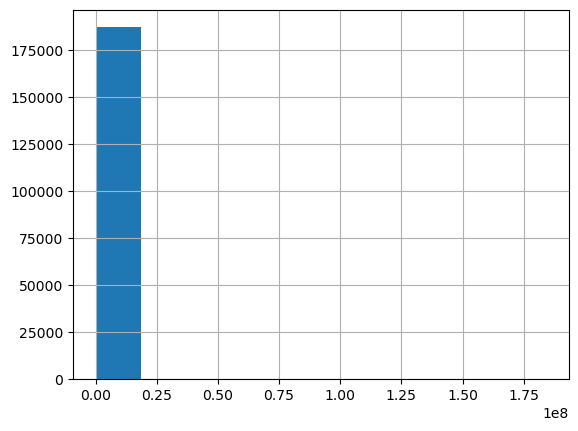

In [234]:
df['count_subs_key'].hist()

In [235]:
df['count_subs_key'].value_counts()

0.0         172066
1.0           2533
4.0           1214
2.0            840
9.0            580
             ...  
331069.0         1
18876.0          1
133474.0         1
619400.0         1
2064.0           1
Name: count_subs_key, Length: 2683, dtype: int64

#### X y

In [236]:
df.head(2)

,client_id,flag_agent,flag_mk,price_plan_count,price_plan_archetype_count,subs_prepaid,subs_active,subs_paid,subs_inactive,subs_cancelled,...,data_traffic_daily_7,data_traffic_daily_8,data_traffic_daily_9,data_traffic_daily_10,data_traffic_daily_11,data_traffic_daily_12,count_subs_key,model_segment_KA,model_segment_LA,model_segment_SME
0,1000007,0,1,1,1,1,1,0,0,0,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.0,0,0,1
1,1000013,0,29,32,31,45,39,28,4,0,...,6696.323537,9092.6692,7637.220606,7293.931997,6896.286481,6876.251077,1080.0,0,1,0


In [237]:
X = df.drop(['flag_mk', 'count_subs_key'], axis = 1)
y = df['count_subs_key'].apply(lambda x: 1 if x > 0 else 0)     # target calculation

print(X.shape)
y.value_counts()

(187144, 463)


0    172066
1     15078
Name: count_subs_key, dtype: int64

In [238]:
# y.hist()

15078 / 187144

0.08056897362458855

#### Filter: count_subs_key == 0

In [239]:
X = df[df['count_subs_key'] == 0].drop(['flag_mk', 'count_subs_key'], axis = 1)

#### Scoring

In [240]:
# clf_lgb = lgb.LGBMClassifier()
# clf_lgb.fit(X, y)

In [241]:
# ************************** read: ***************************

with open('model_MK.pkl', 'rb') as fid:
    
    clf_lgb = pickle.load(fid)

In [242]:
features = ['model_segment_LA',
 'count_other_payments',
 'in_roaming_traffic',
 'out_roaming_traffic',
 'subs_prepaid',
 'subs_old_reactive',
 'out_voice_traffic_daily_12',
 'ban_age',
 'core_revenue_daily_12',
 'subs_active_12',
 'core_margin_12',
 'sms_count',
 'service_cost_9',
 'core_margin_6',
 'sms_count_inn',
 'vas_revenue_daily_inn',
 'data_traffic_12',
 'in_voice_traffic_daily_inn',
 'sum_other_payments',
 'service_revenue_daily_12',
 'subs_inactive_inn',
 'other_vas_cost_daily_inn',
 'subs_paid_12',
 'subs_inactive',
 'subs_reactive',
 'other_cost',
 'count_bank_payments',
 'model_segment_SME']

X[features].shape

(172066, 28)

In [243]:
y_pred_all = clf_lgb.predict_proba(X[features])[:,1]

Text(0.5, 1.0, 'Histogram of scores')

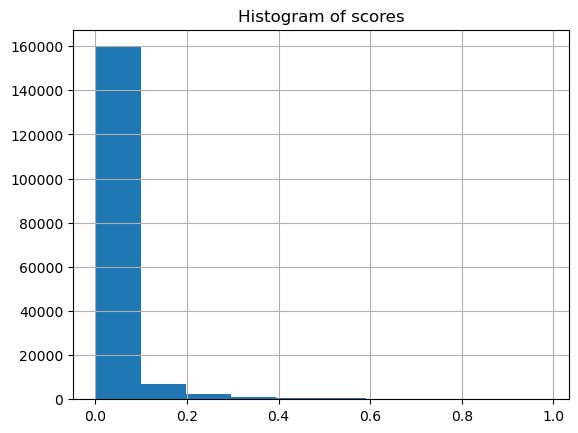

In [244]:
pd.DataFrame(y_pred_all).hist()
plt.title('Histogram of scores')

In [245]:
len(y_pred_all)

172066

In [246]:
X.shape

(172066, 463)

In [247]:
len( y_pred_all[y_pred_all > 0.5] )

1484

In [248]:
y_pred_all_df = pd.DataFrame(y_pred_all)
y_pred_all_df.rename(columns = {0: 'predict'}, inplace = True)
print(y_pred_all_df.shape)
y_pred_all_df.head()

(172066, 1)


,predict
0,0.001375
1,0.004134
2,0.002123
3,0.002604
4,0.006675


In [249]:
print(X.shape)
X['y_pred_all'] = y_pred_all
print(X.shape)
X.head(2)

(172066, 463)
(172066, 464)


,client_id,flag_agent,price_plan_count,price_plan_archetype_count,subs_prepaid,subs_active,subs_paid,subs_inactive,subs_cancelled,subs_reactive,...,data_traffic_daily_7,data_traffic_daily_8,data_traffic_daily_9,data_traffic_daily_10,data_traffic_daily_11,data_traffic_daily_12,model_segment_KA,model_segment_LA,model_segment_SME,y_pred_all
2,1000058,0,5,3,0,5,3,0,0,0,...,20.745333,8.894839,10.384516,12.734667,12.349355,6.725667,0,0,1,0.001375
3,1000065,0,3,2,0,2,2,0,0,0,...,165.158677,153.344848,107.275168,199.566007,156.925494,212.728007,0,0,1,0.004134


In [250]:
def dependency_volume_threshold(y_pred_all):

    list_thresholds, list_number, list_part = [], [], []
    
    # for th_i in range(0, 10):
    # for th_i in range(1, 10):

        # th_i = th_i / 10
    
    for th_i in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
        
        number_i = y_pred_all[y_pred_all['model_score'] >= th_i].shape[0]
        part_i = y_pred_all[y_pred_all['model_score'] >= th_i].shape[0] / y_pred_all['model_score'].shape[0]
        # print(part_i, y_pred_all[y_pred_all['model_score'] >= th_i].shape[0], y_pred_all['model_score'].shape[0])
        
        list_thresholds.append(th_i)
        list_number.append(number_i)
        list_part.append(part_i)

    d = {'thresholds': list_thresholds, 'number': list_number, 'part %': list_part}
    df_th_num = pd.DataFrame(d)
    df_th_num['part %'] = df_th_num['part %'].apply(lambda x: '{:.2%}'.format(x))  

    return df_th_num

In [251]:
y_pred_all_df = pd.DataFrame(y_pred_all)
y_pred_all_df.rename(columns = {0: 'model_score'}, inplace = True)
y_pred_all_df.sort_values(by = 'model_score', ascending = False)

,model_score
165608,0.984745
51878,0.983745
144742,0.982790
126743,0.982162
147236,0.977939
...,...
110126,0.000141
42244,0.000141
110717,0.000140
45893,0.000136


In [252]:
df_th_num = dependency_volume_threshold(y_pred_all_df)
df_th_num

,thresholds,number,part %
0,0.0,172066,100.00%
1,0.1,12509,7.27%
2,0.2,5508,3.20%
3,0.3,3042,1.77%
4,0.4,2105,1.22%
5,0.5,1484,0.86%
6,0.6,1063,0.62%
7,0.7,748,0.43%
8,0.8,457,0.27%
9,0.9,166,0.10%


In [253]:
# df_th_num.to_excel('df_th_num_MK_na.xlsx')

Text(0.5, 0, 'threshold')

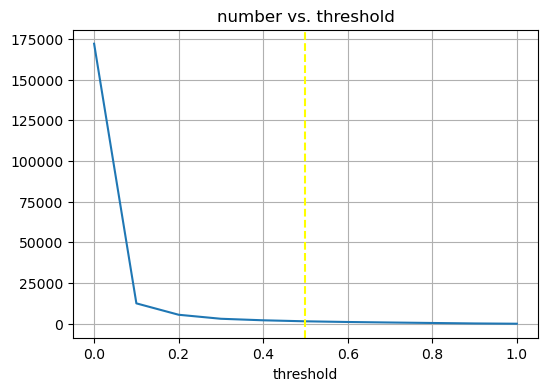

In [254]:
# df_th_num.plot()

plt.figure(figsize = (6, 4))

plt.plot(df_th_num['thresholds'], df_th_num['number'])
plt.axvline(x = 0.5, color = 'yellow', linestyle = '--')

plt.grid()
plt.title('number vs. threshold')
plt.xlabel("threshold")

Text(0.5, 0, 'threshold')

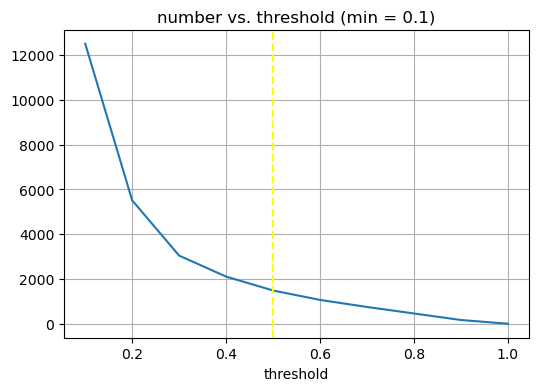

In [255]:
plt.figure(figsize = (6, 4))

plt.plot(df_th_num[df_th_num['thresholds'] >= 0.1]['thresholds'], 
         df_th_num[df_th_num['thresholds'] >= 0.1]['number'])

plt.axvline(x = 0.5, color = 'yellow', linestyle = '--')

plt.grid()
plt.title('number vs. threshold (min = 0.1)')
plt.xlabel("threshold")

In [256]:
print(X.shape)
X.head(3)

(172066, 464)


,client_id,flag_agent,price_plan_count,price_plan_archetype_count,subs_prepaid,subs_active,subs_paid,subs_inactive,subs_cancelled,subs_reactive,...,data_traffic_daily_7,data_traffic_daily_8,data_traffic_daily_9,data_traffic_daily_10,data_traffic_daily_11,data_traffic_daily_12,model_segment_KA,model_segment_LA,model_segment_SME,y_pred_all
2,1000058,0,5,3,0,5,3,0,0,0,...,20.745333,8.894839,10.384516,12.734667,12.349355,6.725667,0,0,1,0.001375
3,1000065,0,3,2,0,2,2,0,0,0,...,165.158677,153.344848,107.275168,199.566007,156.925494,212.728007,0,0,1,0.004134
4,1000083,0,1,1,0,1,1,0,0,0,...,17.948670,129.585810,0.000000,0.000000,0.000000,0.000000,0,0,1,0.002123


In [257]:
X_init = pd.read_pickle('df_MK_new_hist.pkl')

print(X_init.shape)
X_init.head(3)

(1349452, 478)


,client_inn,ban_market,time_key,sbvas,flag_agent,flag_mk,flag_sp,ban_key,client_id,client_name,...,data_traffic_daily_6,data_traffic_daily_7,data_traffic_daily_8,data_traffic_daily_9,data_traffic_daily_10,data_traffic_daily_11,data_traffic_daily_12,stream,scoring_dt,count_subs_key
0,772801726240,VIP,P202504,other_sbvas,0,0,0,803629593,2149450169,Михалева Светлана Анатольевна,...,35.602584,65.469337,71.330652,25.905484,0.095000,27.639035,17.700667,Mob_core,2025-04-01,NaN
1,1657049075,KZN,P202504,other_sbvas,0,1,0,857909792,920360,Холдинговая компания Ак Барс,...,603.522261,440.305003,564.550006,451.899684,492.147337,504.403874,492.564673,Mob_core,2025-04-01,553.0
2,9729343637,SPB,P202504,CPBX,0,0,0,861361242,2149802803,"ООО ""Клондайк""",...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,Mob_core,2025-04-01,NaN


In [258]:
X_init = X_init[X_init['flag_sp'] == 0]
X_init = X_init[X_init['model_segment'] != 'GOS']
X_init.shape

(1214280, 478)

In [259]:
X_init = X_init[['client_id', 'client_inn', 'client_name']].drop_duplicates()
X_init.shape

(187145, 3)

In [260]:
print(X.shape)

X = X.merge(X_init[['client_id', 'client_inn', 'client_name']], how = 'left', on = 'client_id')

print(X.shape)

(172066, 464)
(172066, 466)


In [261]:
X = X.sort_values(by = 'y_pred_all', ascending = False)
X.rename(columns = {'y_pred_all': 'model_score'}, inplace = True)
X[['client_inn', 'client_name', 'model_score']].head(15)

,client_inn,client_name,model_score
165608,9722079341,"""Корпоративный центр ИКС 5"" Публичное акционер...",0.984745
51878,2209024529,"""АГРОПРОМДЕТАЛЬ""",0.983745
144742,5834030330,"""Электросервис""",0.982790
126743,ID-3553641,Ваньков Владимир Васильевич Предприниматель б...,0.982162
147236,165201656307,Казаков Сергей Владимирович,0.977939
29827,2221202506,"ЗМП,ООО",0.977131
42382,1617006212,Государев Амбар,0.976201
143464,3913011336,"Торговый Дом ""Содружество"", ООО",0.973533
155056,ID-8211737,ИП Ткачев Игорь Владимирович,0.972015
132290,7743505170,"Мэйджор Экспресс, ООО",0.970167


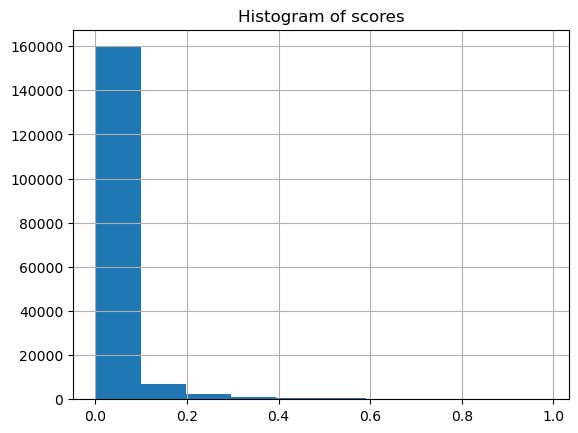

In [262]:
plt.hist(X['model_score'])

pylab.title('Histogram of scores')
plt.grid(True)

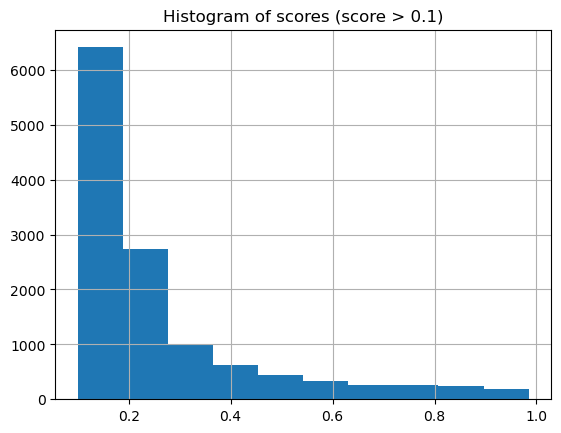

In [263]:
plt.hist(X[X['model_score'] > 0.1]['model_score'])

pylab.title('Histogram of scores (score > 0.1)')
plt.grid(True)

In [ ]:
print(X.shape)
X.head(3)

# (172066, 466)

In [266]:
df_th_num

,thresholds,number,part %
0,0.0,172066,100.00%
1,0.1,12509,7.27%
2,0.2,5508,3.20%
3,0.3,3042,1.77%
4,0.4,2105,1.22%
5,0.5,1484,0.86%
6,0.6,1063,0.62%
7,0.7,748,0.43%
8,0.8,457,0.27%
9,0.9,166,0.10%


In [268]:
X_out = X[['client_inn', 'client_name', 'client_id', 'model_score']][X['model_score'] >= 0.2]
X_out

,client_inn,client_name,client_id,model_score
165608,9722079341,"""Корпоративный центр ИКС 5"" Публичное акционер...",8868306,0.984745
51878,2209024529,"""АГРОПРОМДЕТАЛЬ""",2148413639,0.983745
144742,5834030330,"""Электросервис""",8049195,0.982790
126743,ID-3553641,Ваньков Владимир Васильевич Предприниматель б...,3553641,0.982162
147236,165201656307,Казаков Сергей Владимирович,8076253,0.977939
...,...,...,...,...
128116,2624027712,"КХ Русь-1, ООО",398017,0.200061
132857,3907022675,"ОХРАННОЕ ПРЕДПРИЯТИЕ ФЕМИДА, ООО",541732,0.200058
11808,2463063548,Бугач-Авто,132970,0.200012
136726,6406002225,"Росток Романенко А А, КХ",655126,0.200012


In [269]:
# X_out.to_excel('data_model_MK.xlsx')

In [271]:
print(X.shape)
X.head(3)

(172066, 466)


,client_id,flag_agent,price_plan_count,price_plan_archetype_count,subs_prepaid,subs_active,subs_paid,subs_inactive,subs_cancelled,subs_reactive,...,data_traffic_daily_9,data_traffic_daily_10,data_traffic_daily_11,data_traffic_daily_12,model_segment_KA,model_segment_LA,model_segment_SME,model_score,client_inn,client_name
165608,8868306,-1,1745,1735,0,7766,7598,15,115,77,...,460551.625758,542182.779523,532947.433603,528534.813140,0,0,1,0.984745,9722079341,"""Корпоративный центр ИКС 5"" Публичное акционер..."
51878,2148413639,27,39,39,41,38,30,3,0,0,...,9418.110574,10911.727210,19193.189494,20016.631313,0,0,1,0.983745,2209024529,"""АГРОПРОМДЕТАЛЬ"""
144742,8049195,0,14,14,0,14,14,0,0,0,...,20862.169087,24889.330727,29155.965203,26271.178053,0,0,1,0.982790,5834030330,"""Электросервис"""


In [274]:
X_out_2 = X[['client_inn', 'model_score']]

print(X_out_2.shape)
X_out_2.info()

(172066, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 172066 entries, 165608 to 109807
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   client_inn   172066 non-null  object 
 1   model_score  172066 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.9+ MB


In [272]:
# from pyspark.sql.types import StringType, FloatType, LongType, ByteType, ArrayType, StructType, StructField, IntegerType, DateType

In [275]:
# содержат клиентов до абонентов:
df_sc = spark.read.table('b2b_stg.cvm_box_model_scores')

print('num_rows:', df_sc.count())  
print('num_cols:', len(df_sc.columns))  
df_sc.show(5)

# num_rows: 1 926 281
# num_cols: 6

num_rows: 1926281
num_cols: 6


+------------+------+----------+-------+-------+----------+
|  client_inn|market|     score|product|cut_off| data_load|
+------------+------+----------+-------+-------+----------+
|  5838013776|   PNZ| 0.6866082|   ОАТС|   0.55|2025-03-11|
|  5904355052|   PRM|  0.269304|   ОАТС|   0.55|2025-03-11|
|602712604108|   SPB|0.20698977|   ОАТС|   0.55|2025-03-11|
|602713573702|   PSK|0.34888583|   ОАТС|   0.55|2025-03-11|
|  6141022992|   NZR|0.23840746|   ОАТС|   0.55|2025-03-11|
+------------+------+----------+-------+-------+----------+
only showing top 5 rows



In [278]:
# df_sc.select('market').dropDuplicates().show()

In [289]:
df_sc.select('product').dropDuplicates().show()

+--------------------+
|             product|
+--------------------+
|Таргет_лист_Видео...|
|                ОАТС|
|Таргет_лист_Тарге...|
|          monitoring|
|               cloud|
|            fix_8800|
|           Отток_МОБ|
|                oats|
+--------------------+



In [281]:
X.shape

(172066, 466)

In [280]:
df_sc.printSchema()

root
 |-- client_inn: string (nullable = true)
 |-- market: string (nullable = true)
 |-- score: double (nullable = true)
 |-- product: string (nullable = true)
 |-- cut_off: double (nullable = true)
 |-- data_load: string (nullable = true)



In [ ]:
# market - филиал (если модель не в разрезе филиала и их нету, то я ставлю наны);
# score – это непосредственно сам скор, который предсказала;
# модель;
# cut_off –значение рекомендуемой отсечки (ну то есть, с какого значения скора его надосчитать целевым), например у модели склонности ОАТС это 0.55, значит клиентов
# со скором > 0.55 мы рекомендуем считать склонными.
# product - название продукта или самой модели (типо oats или Отток_моб)
# data_load - дата добавления в таблицу (строкой по типу "2025-07-03")

# А насчёт загрузки данных: я сначала обрабатываю их в pandas df, а потом добавляю их в витрину через:
# spark_df = spark.createDataFrame(df)
# spark_df.write.mode("append").insertInto("b2b_stg.cvm_box_model_scores")

In [285]:

df.head(2)

/tmp/ipykernel_1618/728132981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['market'] = np.nan


,client_inn,score,market
165608,9722079341,0.984745,NaN
51878,2209024529,0.983745,NaN


In [297]:
df = X[['client_inn', 'model_score']].reset_index(drop = True)

df.rename(columns = {'model_score': 'score'}, inplace = True)

# market - филиал (если модель не в разрезе филиала и их нету, то я ставлю наны);
df['market'] = np.nan

df = df[['client_inn', 'market', 'score']]

df['product'] = 'lead_MK'

df['cut_off'] = 0.2

df['data_load'] = '2025-07-04'

print(df.shape)
df.head(2)

(172066, 6)


,client_inn,market,score,product,cut_off,data_load
0,9722079341,NaN,0.984745,lead_MK,0.2,2025-07-04
1,2209024529,NaN,0.983745,lead_MK,0.2,2025-07-04


In [295]:
df_sc.show(5)

+------------+------+----------+-------+-------+----------+
|  client_inn|market|     score|product|cut_off| data_load|
+------------+------+----------+-------+-------+----------+
|  5838013776|   PNZ| 0.6866082|   ОАТС|   0.55|2025-03-11|
|  5904355052|   PRM|  0.269304|   ОАТС|   0.55|2025-03-11|
|602712604108|   SPB|0.20698977|   ОАТС|   0.55|2025-03-11|
|602713573702|   PSK|0.34888583|   ОАТС|   0.55|2025-03-11|
|  6141022992|   NZR|0.23840746|   ОАТС|   0.55|2025-03-11|
+------------+------+----------+-------+-------+----------+
only showing top 5 rows



In [299]:
# ******************************************************************************************************

In [298]:
# spark_df = spark.createDataFrame(df)

# spark_df.write.mode("append").insertInto("b2b_stg.cvm_box_model_scores")

In [300]:
# содержат клиентов до абонентов:
df_sc = spark.read.table('b2b_stg.cvm_box_model_scores')

print('num_rows:', df_sc.count())  
print('num_cols:', len(df_sc.columns))  
df_sc.show(5)

# num_rows: 1 926 281
# num_cols: 6

num_rows: 2098347
num_cols: 6


+------------+------+----------+-------+-------+----------+
|  client_inn|market|     score|product|cut_off| data_load|
+------------+------+----------+-------+-------+----------+
|  5838013776|   PNZ| 0.6866082|   ОАТС|   0.55|2025-03-11|
|  5904355052|   PRM|  0.269304|   ОАТС|   0.55|2025-03-11|
|602712604108|   SPB|0.20698977|   ОАТС|   0.55|2025-03-11|
|602713573702|   PSK|0.34888583|   ОАТС|   0.55|2025-03-11|
|  6141022992|   NZR|0.23840746|   ОАТС|   0.55|2025-03-11|
+------------+------+----------+-------+-------+----------+
only showing top 5 rows



In [301]:
1926281 + 172066

2098347

In [302]:
df_sc.filter(df_sc.product == 'lead_MK').show()

+------------+------+--------------------+-------+-------+----------+
|  client_inn|market|               score|product|cut_off| data_load|
+------------+------+--------------------+-------+-------+----------+
|622813208230|  NULL|0.025257151153959594|lead_MK|    0.2|2025-07-04|
|  8603141119|  NULL|0.025255485345665313|lead_MK|    0.2|2025-07-04|
|  5027044332|  NULL|0.025254857172129077|lead_MK|    0.2|2025-07-04|
|  7709870046|  NULL|0.025254857172129077|lead_MK|    0.2|2025-07-04|
|616112692459|  NULL| 0.02525063987582561|lead_MK|    0.2|2025-07-04|
|  7810390873|  NULL| 0.02525008449976478|lead_MK|    0.2|2025-07-04|
|  4205263343|  NULL| 0.02524627670384695|lead_MK|    0.2|2025-07-04|
|  7723379584|  NULL|0.025241973421632345|lead_MK|    0.2|2025-07-04|
|  7704746006|  NULL| 0.02524104956526971|lead_MK|    0.2|2025-07-04|
|  4416004789|  NULL| 0.02523975086092365|lead_MK|    0.2|2025-07-04|
|  7721370875|  NULL| 0.02523850310609337|lead_MK|    0.2|2025-07-04|
|  2204041150|  NULL